In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [156]:
# Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots 

# Import the Data

In [157]:
book=pd.read_csv('C:\\Users\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Assoc_Rules\\book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [158]:
book.shape

(2000, 11)

In [159]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


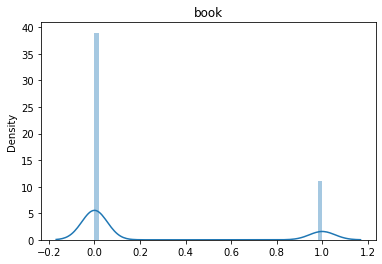

In [160]:
sns.distplot(book)
plt.title("book");

# Pre-Processing

As the data is not in transaction formation We are using transaction Encoder

In [161]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

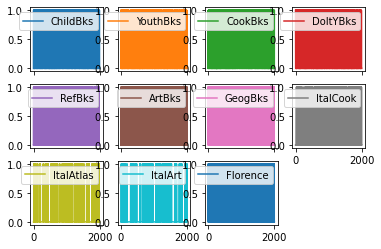

In [162]:
df.plot(subplots=True, layout=(3,4))

# Apriori Algorithm 

In [163]:
frequent_itemsets = apriori(df, min_support=0.04, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
86,0.0640,"(ItalCook, CookBks, GeogBks)"
87,0.0535,"(ArtBks, DoItYBks, RefBks)"
88,0.0585,"(DoItYBks, RefBks, GeogBks)"
89,0.0730,"(DoItYBks, ArtBks, GeogBks)"


In [164]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
86,0.0640,"(ItalCook, CookBks, GeogBks)",3
87,0.0535,"(ArtBks, DoItYBks, RefBks)",3
88,0.0585,"(DoItYBks, RefBks, GeogBks)",3
89,0.0730,"(DoItYBks, ArtBks, GeogBks)",3


In [165]:
frequent_itemsets.sort_values("support", ascending = False).head()

,support,itemsets,length
2,0.431,(CookBks),1
0,0.423,(ChildBks),1
3,0.282,(DoItYBks),1
6,0.276,(GeogBks),1
11,0.256,"(ChildBks, CookBks)",2


In [173]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
192,"(DoItYBks, GeogBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
193,"(ArtBks, GeogBks)",(DoItYBks),0.1275,0.2820,0.0730,0.572549,2.030316,0.037045,1.679725
194,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
195,"(ArtBks, GeogBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581


In [167]:
# An leverage value of 0 indicates independence. Range will be [-1 1]

In [174]:
rules[(rules.support > 0.045) & (rules.confidence > 0.5)].sort_values("confidence", ascending = False).shape

(133, 9)

In [175]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
180,"(CookBks, ItalArt)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf,2
53,"(ChildBks, YouthBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579,2
131,"(YouthBks, DoItYBks)",(RefBks),0.1155,0.2145,0.0580,0.502165,2.341093,0.033225,1.577830,2
146,"(YouthBks, ArtBks)",(GeogBks),0.1010,0.2760,0.0650,0.643564,2.331755,0.037124,2.031222,2
176,"(ArtBks, ItalCook)",(CookBks),0.0565,0.4310,0.0565,1.000000,2.320186,0.032148,inf,2


In [179]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')



<AxesSubplot:xlabel='consequents_', ylabel='consequents_'>

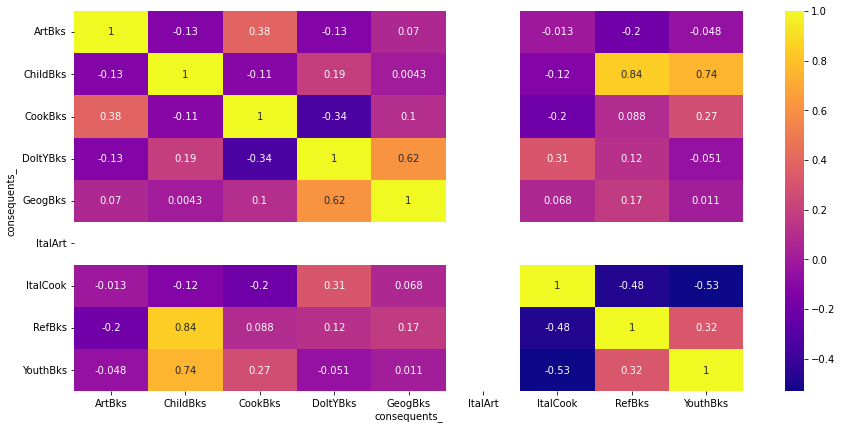

In [171]:
plt.figure(figsize=(15,7))
sns.heatmap(pivot.corr(),annot=True,cmap='plasma')